# Feature Engineering in Boston Housing Data

In this notebook, we will:
1. Explore how feature engineering can help us improve the model. 
2. We will explore boston housing data
3. We will create/engineer some new features based on our EDA. 
4. Observe Feature Engineering help improve the model. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# Regression Without Feature Engineering

In [5]:
# Load and preprocess dataset
boston = pd.read_csv("Data/boston.csv").drop(columns=["Unnamed: 0"])

The data before feature engineering has as shape of (506, 12)
Without Feature Engineering:
  R-squared: 0.6834
  Mean Squared Error: 23.2155


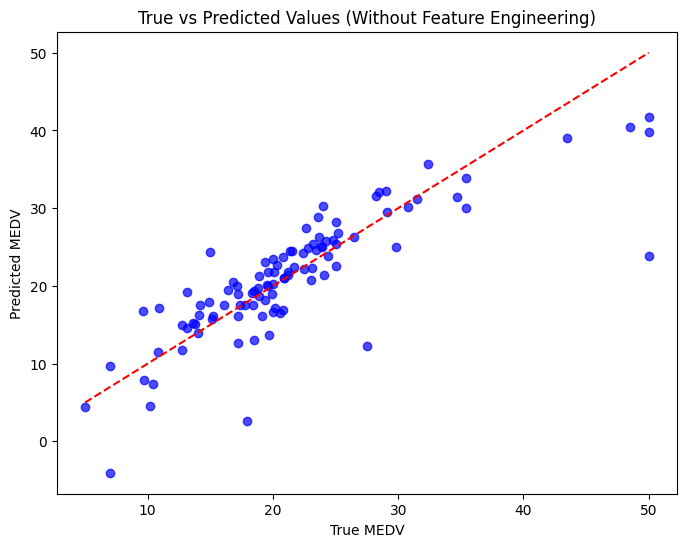

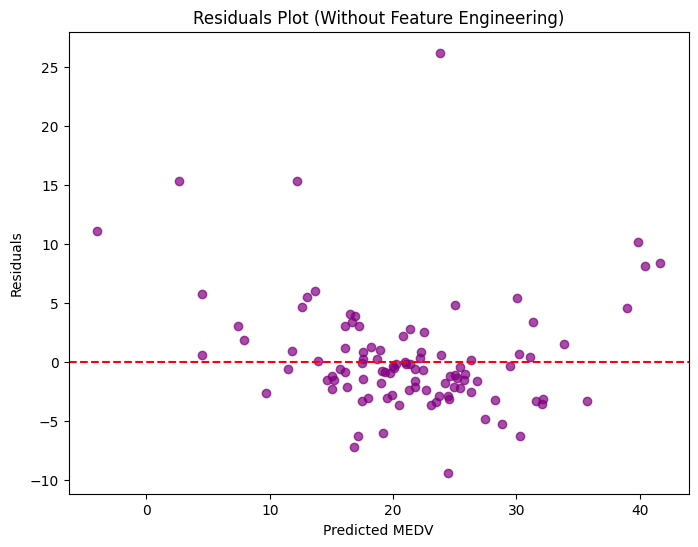

In [6]:
# Load dataset without feature engineering

X_all_features = boston.drop(columns=["medv"]).values
y_all_features = boston["medv"]
print('The data before feature engineering has as shape of', X_all_features.shape)

X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_all_features, y_all_features, test_size=0.2, random_state=42)
scaler_all = StandardScaler()
X_train_all_scaled = scaler_all.fit_transform(X_train_all)
X_test_all_scaled = scaler_all.transform(X_test_all)
lasso_all = Lasso(alpha=0.04).fit(X_train_all_scaled, y_train_all)

# Predictions
y_test_all_pred = lasso_all.predict(X_test_all_scaled)

# Print MSE and R-squared
mse_all = mean_squared_error(y_test_all, y_test_all_pred)
r2_all = r2_score(y_test_all, y_test_all_pred)
print(f"Without Feature Engineering:\n  R-squared: {r2_all:.4f}\n  Mean Squared Error: {mse_all:.4f}")

# Visualization: True vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_all, y_test_all_pred, alpha=0.7, color='blue')
plt.plot([min(y_test_all), max(y_test_all)], [min(y_test_all), max(y_test_all)], color='red', linestyle='--')
plt.xlabel("True MEDV")
plt.ylabel("Predicted MEDV")
plt.title("True vs Predicted Values (Without Feature Engineering)")
plt.show()

# Residuals plot
residuals_no_fe = y_test_all - y_test_all_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_all_pred, residuals_no_fe, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residuals Plot (Without Feature Engineering)")
plt.show()


# Regression With Feature Engineering

In [4]:
# Load and preprocess dataset
boston = pd.read_csv("Data/boston.csv").drop(columns=["Unnamed: 0"])

### Lets do some EDA to help feature engineer

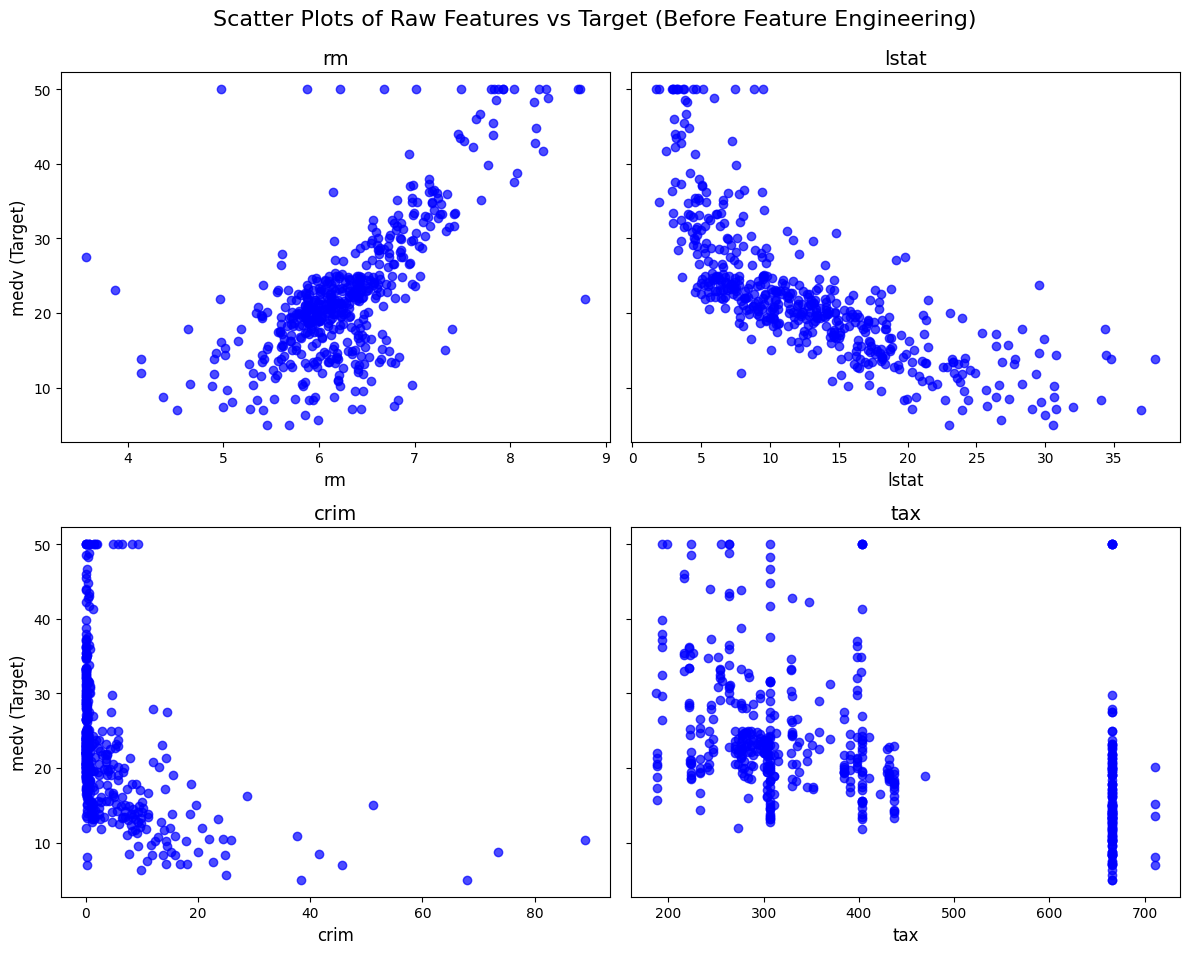

In [5]:
# Lets look at scatter plots of some features and target

# Create a matrix grid of scatter plots for raw features vs target (2 rows for better visualization)
# Select raw features for plotting (before feature engineering)
raw_features_to_plot = ['rm', 'lstat', 'crim', 'tax']

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharey=True)
axes = axes.flatten()  # Flatten axes for easy iteration

# Generate scatter plots for each raw feature against the target (medv)
for i, feature in enumerate(raw_features_to_plot):
    axes[i].scatter(boston[feature], boston['medv'], alpha=0.7, color='blue')
    axes[i].set_title(feature, fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    if i % 2 == 0:  # Add ylabel only to the first column
        axes[i].set_ylabel('medv (Target)', fontsize=12)

# Adjust layout and display the plot
plt.suptitle("Scatter Plots of Raw Features vs Target (Before Feature Engineering)", y=0.95, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()


In [6]:
# Create some featured engineer features (Interaction or transformed variables)
boston['rm_lstat_interaction'] = boston['rm'] * boston['lstat']
boston['crim_log'] = np.log1p(boston['crim']) # (calculates log(1+x))
boston['tax_per_room'] = boston['tax'] / boston['rm']

poly = PolynomialFeatures(degree=[2,2], include_bias=False) # degree = [min_degre, max_degree]
poly_features = poly.fit_transform(boston[['rm', 'lstat']])
print('Poly_Feature shape is:', poly_features.shape)
# Data with new features
X_combined = np.hstack([boston.drop(columns=["medv"]).values, boston[['rm_lstat_interaction', 'crim_log', 'tax_per_room']].values, poly_features])
y = boston['medv']

print('The dataset with engineered features has a shape of',X_combined.shape)

Poly_Feature shape is: (506, 3)
The dataset with engineered features has a shape of (506, 21)


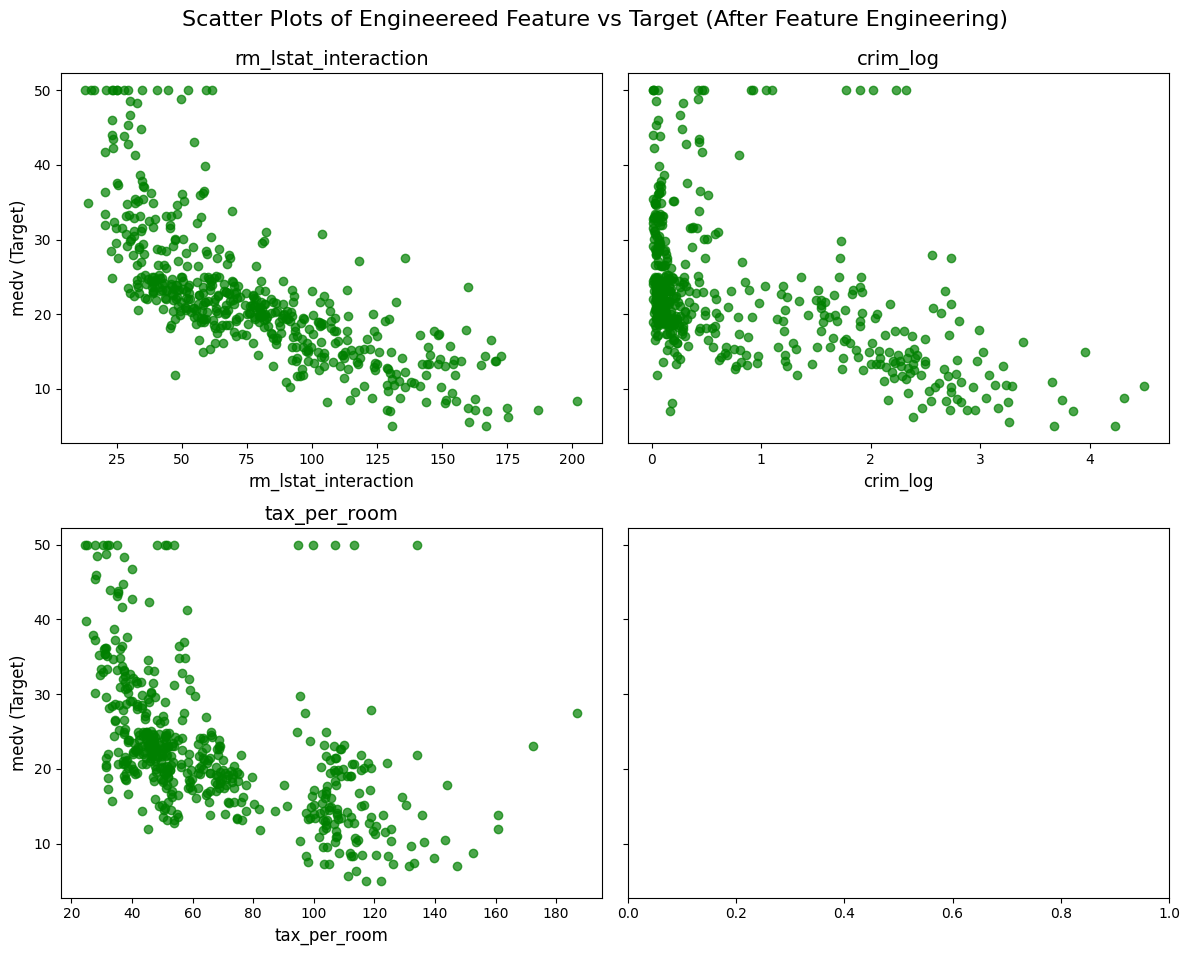

In [7]:
# Lets look at scatter plots of some of feature engineered features and target

engineered_features_to_plot = ['rm_lstat_interaction', 'crim_log', 'tax_per_room', ]

# Set up the figure and axes for a 2x2 grid
fig, axes = plt.subplots(2,2, figsize=(12, 10), sharey=True)
axes = axes.flatten()  # Flatten axes for easy iteration

# Generate scatter plots for each engineered feature against the target (medv)
for i, feature in enumerate(engineered_features_to_plot):
    axes[i].scatter(boston[feature], boston['medv'], alpha=0.7, color='green')
    axes[i].set_title(feature, fontsize=14)
    axes[i].set_xlabel(feature, fontsize=12)
    if i % 2 == 0:  # Add ylabel only to the first column
        axes[i].set_ylabel('medv (Target)', fontsize=12)

# Adjust layout and display the plot
plt.suptitle("Scatter Plots of Engineereed Feature vs Target (After Feature Engineering)", y=0.95, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()


With Feature Engineering:
  R-squared: 0.8010
  Mean Squared Error: 14.5926


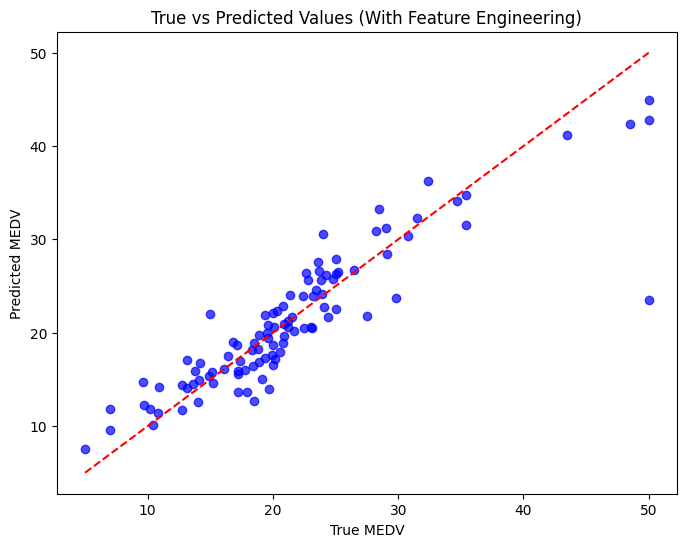

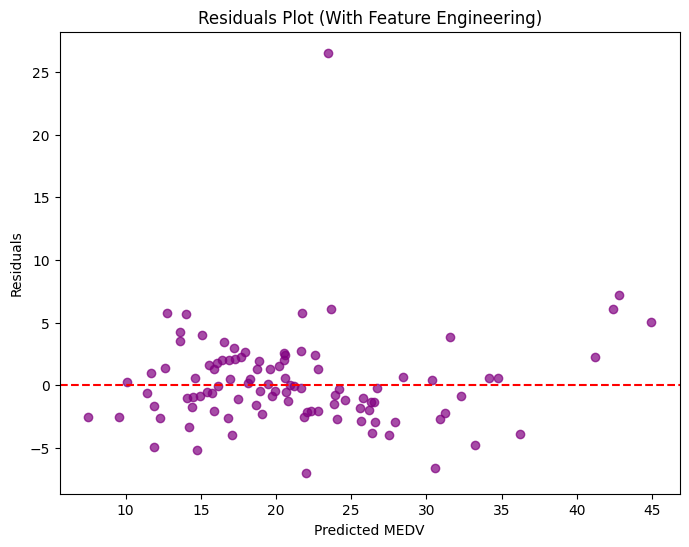

In [8]:
# Divide data to Train and Test Set
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y, test_size=0.2, random_state=42)
scaler_combined = StandardScaler()
X_train_combined_scaled = scaler_combined.fit_transform(X_train_combined)
X_test_combined_scaled = scaler_combined.transform(X_test_combined)
lasso_combined = Lasso(alpha=0.0356).fit(X_train_combined_scaled, y_train_combined)

# Predictions
y_test_combined_pred = lasso_combined.predict(X_test_combined_scaled)

# Print MSE and R-squared
mse_combined = mean_squared_error(y_test_combined, y_test_combined_pred)
r2_combined = r2_score(y_test_combined, y_test_combined_pred)
print(f"With Feature Engineering:\n  R-squared: {r2_combined:.4f}\n  Mean Squared Error: {mse_combined:.4f}")

# Visualization: True vs. Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test_combined, y_test_combined_pred, alpha=0.7, color='blue')
plt.plot([min(y_test_combined), max(y_test_combined)], [min(y_test_combined), max(y_test_combined)], color='red', linestyle='--')
plt.xlabel("True MEDV")
plt.ylabel("Predicted MEDV")
plt.title("True vs Predicted Values (With Feature Engineering)")
plt.show()

# Residuals plot
residuals_combined = y_test_combined - y_test_combined_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_combined_pred, residuals_combined, alpha=0.7, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted MEDV")
plt.ylabel("Residuals")
plt.title("Residuals Plot (With Feature Engineering)")
plt.show()

## Observation: 
We are able to improve the model by doing some feature engineering. 

In [9]:
print(f"Without Feature Engineering:\n  R-squared: {r2_all:.4f}\n  Mean Squared Error: {mse_all:.4f}")
print('*************************************************************')
print(f"With Feature Engineering:\n  R-squared: {r2_combined:.4f}\n  Mean Squared Error: {mse_combined:.4f}")

Without Feature Engineering:
  R-squared: 0.6834
  Mean Squared Error: 23.2155
*************************************************************
With Feature Engineering:
  R-squared: 0.8010
  Mean Squared Error: 14.5926
